Assignment 0 - Task 2

# Implementing a Multi-Class Perceptron Algorithm from Scratch

In this task, we design and implement a simple neural network from scratch to classify images of handwritten digits from the simplified MNIST dataset. We will explore different weight initialization strategies, train the network using gradient descent (with two different learning rates), and evaluate its performance.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Loading and Preparing the Data

We begin by loading the training and test datasets and appending a column of ones to account for the bias term.

In [4]:
# Load the data
train_x = pd.read_csv('train_in.csv', header=None).values
train_y = pd.read_csv('train_out.csv', header=None).values.flatten()
test_x = pd.read_csv('test_in.csv', header=None).values
test_y = pd.read_csv('test_out.csv', header=None).values.flatten()

# Append a column of ones to the train and test data to account for bias term
T_train = np.append(train_x, np.ones((train_x.shape[0], 1)), axis=1)
T_test = np.append(test_x, np.ones((test_x.shape[0], 1)), axis=1)

## 2. Weight Initialization Strategies

We define functions to initialize weights using two different strategies:

**A) Random Initialization**  
**B) Glorot Initialization**

In [36]:
def initialize_weights_random(input_dim, output_dim):
    return np.random.uniform(-1, 1, (input_dim, output_dim))

def initialize_weights_glorot(input_dim, output_dim):
    limit = np.sqrt(6 / (input_dim + output_dim))
    return np.random.uniform(-limit, limit, (input_dim, output_dim))

# Select weight initialization based on the provided method
def initialize_weights(input_dim, output_dim, init_type):
    if init_type == 'rand':
        return initialize_weights_random(input_dim, output_dim)
    elif init_type == 'glorot':
        return initialize_weights_glorot(input_dim, output_dim)
    else:
        raise ValueError("Unknown initialization type.")

## 3. Defining the Neural Network Functions

We define functions for:

- **Classification**: Compute the outputs and predicted class labels.
- **Performance Evaluation**: Calculate loss and accuracy.
- **Weights Update**: Update weights based on gradients and learning rate.

In [6]:
# Classify the inputs based on current weights
def classify(input_data, model_weights):
    outputs = np.dot(input_data, model_weights)
    classifications = np.argmax(outputs, axis=1)
    return outputs, classifications

# Evaluate performance of the model: calculate loss and accuracy
def evaluate_performance(model_outputs, model_classifications, correct_labels):
    num_samples = len(correct_labels)
    deviations = np.zeros(model_outputs.shape)
    total_loss = 0
    correct_classifications = np.zeros(num_samples)
    
    for i in range(num_samples):
        output = model_outputs[i]
        correct_output = np.zeros(10)
        correct_label = correct_labels[i]
        correct_output[int(correct_label)] = 1
        deviation = output - correct_output
        deviations[i] = deviation
        loss = np.sum(deviation ** 2)
        total_loss += loss
        if model_classifications[i] == correct_label:
            correct_classifications[i] = 1
    
    avg_loss = total_loss / num_samples
    accuracy = correct_classifications.mean()
    return deviations, avg_loss, accuracy

# Update weights based on gradients and learning rate
def update_weights(weight_matrix, alpha, input_data, output_deviations):
    num_samples = input_data.shape[0]
    # Compute gradient
    gradients = np.dot(input_data.T, 2 * output_deviations) / num_samples
    # Update weights
    weight_matrix -= alpha * gradients
    return weight_matrix

## 4. Training the Network

We define a function to train the network over a number of epochs, collecting performance metrics.

In [7]:
def train_network(train_input, train_labels, test_input, test_labels, W, alpha, epochs):
    train_losses = []
    train_accuracies = []
    test_losses = []
    test_accuracies = []
    
    for epoch in range(epochs):
        # Forward pass on training set
        train_outputs, train_classifications = classify(train_input, W)
        train_deviations, avg_train_loss, train_accuracy = evaluate_performance(
            train_outputs, train_classifications, train_labels)
        
        # Forward pass on test set
        test_outputs, test_classifications = classify(test_input, W)
        test_deviations, avg_test_loss, test_accuracy = evaluate_performance(
            test_outputs, test_classifications, test_labels)
        
        # Store losses and accuracies
        train_losses.append(avg_train_loss)
        train_accuracies.append(train_accuracy)
        test_losses.append(avg_test_loss)
        test_accuracies.append(test_accuracy)
        
        # Update weights using gradient descent
        W = update_weights(W, alpha, train_input, train_deviations)
        
        # Print progress every 50 epochs
        if (epoch + 1) % 50 == 0 or epoch == 0:
            print(f"Epoch {epoch+1}/{epochs} - Alpha {alpha}: Train Acc = {train_accuracy:.4f}, Test Acc = {test_accuracy:.4f}")
    
    return train_losses, train_accuracies, test_losses, test_accuracies

## 5. Plotting the Results

We define a function to plot the training and test loss and accuracy over epochs for different learning rates.

In [17]:
def plot_results(epochs, results, learning_rates):
    epochs_range = range(1, epochs + 1)
    linestyles = ['-', '--']  # different line styles for the two learning rates
    red_shades = ['#ff9999', '#ff0000']  # different shades of red for train loss/accuracy
    blue_shades = ['#99ccff', '#0066cc']  # different shades of blue for test loss/accuracy
    
    plt.figure(figsize=(12, 5))
    
    # plot for loss
    plt.subplot(1, 2, 1)
    for i, alpha in enumerate(learning_rates):
        train_losses, _, test_losses, _ = results[alpha]
        plt.plot(epochs_range, train_losses, label=f'Train Loss (α={alpha})', color=red_shades[i], linestyle=linestyles[i])
        plt.plot(epochs_range, test_losses, label=f'Test Loss (α={alpha})', color=blue_shades[i], linestyle=linestyles[i])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss over Epochs')
    plt.legend(loc="upper right")

    # plot for accuracy
    plt.subplot(1, 2, 2)
    for i, alpha in enumerate(learning_rates):
        _, train_accuracies, _, test_accuracies = results[alpha]
        plt.plot(epochs_range, train_accuracies, label=f'Train Accuracy (α={alpha})', color=red_shades[i], linestyle=linestyles[i])
        plt.plot(epochs_range, test_accuracies, label=f'Test Accuracy (α={alpha})', color=blue_shades[i], linestyle=linestyles[i])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy over Epochs')
    plt.legend(loc="lower right")

    plt.tight_layout()
    plt.show()

## 6. Training and Evaluating the Network

We set up the model parameters, initialize the weights, and train the network with different learning rates.

In [34]:
# Model setup and training parameters
input_size = T_train.shape[1]
output_size = 10
epochs = 1000
learning_rates = [0.01, 0.001]

results = {}
for alpha in learning_rates:
    # Initialize weights (options: 'rand'/'glorot')
    W = initialize_weights(input_size, output_size, 'glorot')
    
    # Train the network
    train_losses, train_accuracies, test_losses, test_accuracies = train_network(
        T_train, train_y, T_test, test_y, W, alpha, epochs)
    
    # Store the results
    results[alpha] = (train_losses, train_accuracies, test_losses, test_accuracies)

Epoch 1/1000 - Alpha 0.01: Train Acc = 0.0574, Test Acc = 0.0390
Epoch 50/1000 - Alpha 0.01: Train Acc = 0.4938, Test Acc = 0.4680
Epoch 100/1000 - Alpha 0.01: Train Acc = 0.7170, Test Acc = 0.6390
Epoch 150/1000 - Alpha 0.01: Train Acc = 0.7756, Test Acc = 0.6930
Epoch 200/1000 - Alpha 0.01: Train Acc = 0.8207, Test Acc = 0.7270
Epoch 250/1000 - Alpha 0.01: Train Acc = 0.8442, Test Acc = 0.7450
Epoch 300/1000 - Alpha 0.01: Train Acc = 0.8600, Test Acc = 0.7620
Epoch 350/1000 - Alpha 0.01: Train Acc = 0.8694, Test Acc = 0.7760
Epoch 400/1000 - Alpha 0.01: Train Acc = 0.8805, Test Acc = 0.7890
Epoch 450/1000 - Alpha 0.01: Train Acc = 0.8869, Test Acc = 0.8090
Epoch 500/1000 - Alpha 0.01: Train Acc = 0.8922, Test Acc = 0.8170
Epoch 550/1000 - Alpha 0.01: Train Acc = 0.8998, Test Acc = 0.8180
Epoch 600/1000 - Alpha 0.01: Train Acc = 0.9051, Test Acc = 0.8200
Epoch 650/1000 - Alpha 0.01: Train Acc = 0.9092, Test Acc = 0.8220
Epoch 700/1000 - Alpha 0.01: Train Acc = 0.9115, Test Acc = 0.828

## 7. Plotting the Results

We plot the loss and accuracy curves for the different learning rates.

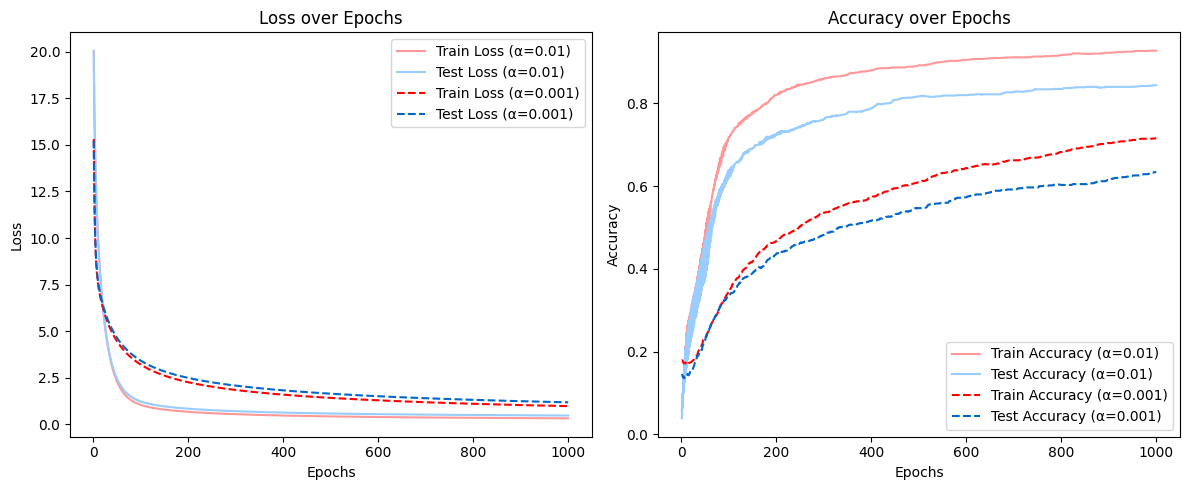

In [35]:
# Plot the comparison of results for different learning rates
plot_results(epochs, results, learning_rates)

## Discussion

The choice of weight initialization strategy and learning rate impacts the convergence speed and the final performance of the model.

After 1000 training epochs, the single-layer multi-class perceptron with Glorot weight initialization and a learning rate of 0.01 performed better than the simplistic nereast mean classifier, but still significantly worse than the KNN classifier.